# Correlation 

## Configure python environment and import needed libraries
 1. enable MATLAB emulation mode (%pylab)
 1. Import Pandas statistics library, and call it as pd from now on

In [1]:
%pylab 
import pandas as pd


Using matplotlib backend: <object object at 0x7f9194c73730>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Read the sample data from csv-file

The file contains sound measurements near Santavuori wind park in June 2016. The file contains five columns, the first column is a timestamp, the four following columns describe certain properties of the sound:
- AM = amplitude modulation (pulsating character)
- LL = Linearly weighted sound pressure level (SPL)
- LC = C-weighted SPL
- LA = A-weighted SPL

You may study more about different [weighthings from Wikipedia](https://en.wikipedia.org/wiki/A-weighting) if interested.

`,AM,LL,LC,LA
2017-06-01T00:00:00,9.5399842997,62.7491815241,44.4971670418,34.8771053292
2017-06-01T00:00:10,8.41053731201,65.9948428886,44.7835772035,36.012519387
2017-06-01T00:00:20,6.1813068034,62.7160571082,44.0735043454,35.0533055272
2017-06-01T00:00:30,6.29460558605,62.915184801,44.618351916,34.8190087386`

Read comma separated values from Santavuori_sample.csv file, using read_csv function from pandas module. 
CSV-reading function can also parse the timestamp values if needed. To do so you need to specify in which column the date and time parsing is tried. Note that column numbering starts from zero. The colun index is actually a Python list, and it may contain many columns, like [0,1,5]. In the example below, only the first column (whose index is zero) will be parsed.

The result will be a Pandas data frame, called d, which has 999 rows and 4 columns and a timestamp as an index field. 

In [2]:
d=pd.read_csv('data/Santavuori_sample.csv', parse_dates=[0], index_col=0)
print("Data shape of the data frame d is ", d.shape)
d.head(3)

Data shape of the data frame d is  (999, 4)


,AM,LL,LC,LA
2017-06-01 00:00:00,9.539984,62.749182,44.497167,34.877105
2017-06-01 00:00:10,8.410537,65.994843,44.783577,36.012519
2017-06-01 00:00:20,6.181307,62.716057,44.073504,35.053306


## Correlation
Correlation between each variable can be easily calculated using corr-function, which is build in the pandas dataframe. The default mathod is Pearsson correlation.

### Pearsson
$$
   r_{xy}= \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}
      {\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2} \sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$
Pearsson correlation has the following assumptions:

1. Each observation should have a pair of values.
1. Each variable should be continuous.
1. Each variable should be normally distributed.
1. It should be the absence of outliers.
1. It assumes linearity and homoscedasticity.

Pearsson correlation should not be used if one of these assumptions is not met or reasonably close to be true. Usually you need to check if the variables are normally distributed before using Pearsson correlation. If the assumptions are true, Pearsson correlation coefficient is an optimal choice.

### Spearman's rank correlation coefficient
$$
   r_s = 1- \frac{6 \sum_{i=1}^{n} d_i^2}{n(n^2-1)},
$$

where $d_i$ is the difference of ranks in pairs $(rg(x_i)- rg(y_i))$, and $rg(x_i)$ is the rank of $x_i$.

Assumptions:
1. Pairs of observations are independent.
1. Two variables should be measured on an ordinal, interval or ratio scale.
1. It assumes that there is a monotonic relationship between the two variables.

Spearman's correlation coefficient has less assumptions, and it can be used when the data is not normally distributed.

### Kendall's tau coefficient

The same assumptions and spearman's correlation. 

### Comparison

Pearsson correlation is more powerfull, if the assumptions are met, because the non-parametric correlations (Spearman and Kendall) have to cope with less data. 

Notice that correlation only measures linear dependency (Pearsson) or monotonic dependency (Spearman and Kendall). Therefore, if two variables are connected with some more complex dependency, like parabolic or sinusoidal, their correlation may still be zero.


In [3]:
d.corr()

,AM,LL,LC,LA
AM,1.000000,0.646448,-0.160820,-0.253381
LL,0.646448,1.000000,0.176244,-0.126415
LC,-0.160820,0.176244,1.000000,0.678162
LA,-0.253381,-0.126415,0.678162,1.000000


It is easy to use other correlation coefficients as well, such as spearman or kendall.

In [4]:
d.corr(method='spearman')

,AM,LL,LC,LA
AM,1.000000,0.499386,-0.129000,-0.251718
LL,0.499386,1.000000,0.199532,-0.117988
LC,-0.129000,0.199532,1.000000,0.788282
LA,-0.251718,-0.117988,0.788282,1.000000


Correlation between each variable, can be also studied visually

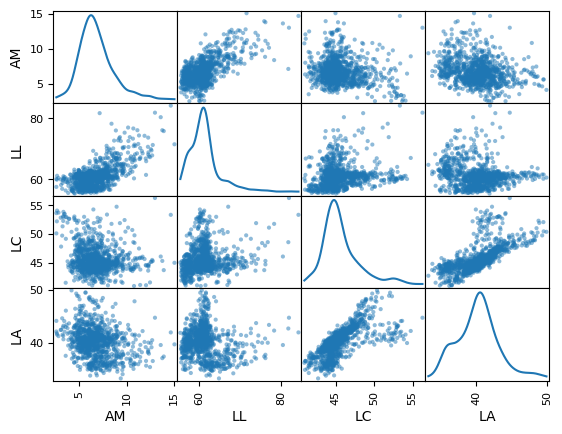

In [5]:
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(d, diagonal='kde');


### Hypothesis testing

Hypothesis testing is important part of evaluating the data and the models. In the case of correlation, the hypothesis testing finds out what is the propability that the correlation is happened by accident, without the underlying processes being truly correlated. In this case, the zero hypothesis is that there is no real correlation, and if the p-value is small enough, we can assume that the probability is true, since the probability of accidental correlation is very low, below the threshold a (p<a). 

![p-value](kuvat/p-value.svg)

### Significancy of correlation

In some cases, when there is too little data compared to the variance of the data, and the correlation coefficient can be large by change, even though there is no real correlation between the variables. The significancy (the p-value) of the correlation can be used to find out if there is enough samples to safely assume that the the correlation is real and not by change.

Unfortunately the correlation function in Pandas, does not provide p-values, so let's use the pearsonr-function from stats package of Scientific Python

In [6]:
from scipy.stats import pearsonr

n=len(d)
a=0.05
r,p=pearsonr(d.LC, d.LA)
if p<a:
    sig = "significant"
else:
    sig = "not significant"
print("Correlation between LC and LA is %5.2f and p-value is %7.6f, n=%3d and it is %s" % (r,p,n, sig))

r,p=pearsonr(d.AM, d.LA)
if p<a:
    sig = "significant"
else:
    sig = "not significant"
print("Correlation between AM and LA is %5.2f and p-value is %7.6f, n=%3d and it is %s" % (r,p, n, sig))

n=20
r,p=pearsonr(d.AM[:n], d.LA[:n])
if p<a:
    sig = "significant"
else:
    sig = "not significant"
print("Correlation between AM and LA is %5.2f and p-value is %7.6f, n=%3d and it is %s" % (r,p,n, sig))


Correlation between LC and LA is  0.68 and p-value is 0.000000, n=999 and it is significant
Correlation between AM and LA is -0.25 and p-value is 0.000000, n=999 and it is significant
Correlation between AM and LA is  0.26 and p-value is 0.261073, n= 20 and it is not significant


The variable LC and LA clearly correlate in the first case, and AM and LA in the second case. LC and LA has strong positive correlation and AM and LA weak negative correlation. The probability that these correlations could happen by change are clearly much lover than 5%, so the correlation is true.

If we only use 20 samples, then the propability that the correlation value is obtained by change is 26%, which makes the obtained coefficient insignificant, and we cannot conlude anything about it. 

Try how large n should be that the correlation becomes significant?

## Regression

Traditional regression, or Ordinary Least Squares (OLS) regression is an important concept in machine learning. OLS regression is a model which assumes that a variable $y$ is linearly dependent on variable $x$, or several varirables $x_i$. In this case, the value of the dependent variable $y$ can be estimated (predicted) from the independent variables $x_i$ by using a linear model. 

This is OLS in general form  $$y_i=\beta_i1 x_1 + \beta_2 x_i2 + \beta_3 x_i3 + \epsilon_i$$

The model is simply the values of the coefficient $\beta_i$ which needs to be found. The noise included in the model is described as $\epsilon$.

Training of the model is finding optimal values for $\beta_i$, and it means graphically fitting a line in the point cloud $(x_i, y_i)$.

### Regression model using Ordinary Least Squares (OLS) model from statsmodels library

Lets calculate the regression model which tries to predict the variable LC from LA using the statsmodel library as follows:

In [8]:
import statsmodels.formula.api as smf

print("\nOrdinary Linear Regression model for predicting LC from LA")
model = smf.ols(formula="LC ~ LA", data=d).fit()
print(model.params)



Ordinary Linear Regression model for predicting LC from LA
Intercept    22.764895
LA            0.569569
dtype: float64


What the model sais is that the LC can be predicted from the values of LA with the following model:

$$LA = 0.57 \cdot LC + 22.76$$

Lets check graphically how does that look like:

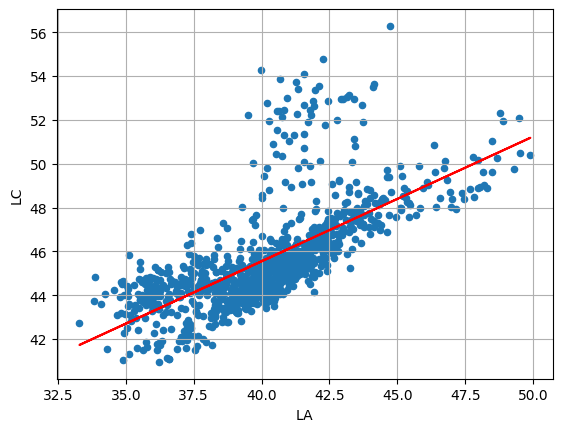

In [9]:

# Plot the scatter plot of observations LC vs LA
d.plot.scatter('LA', 'LC')

# Predict the values of LC based on LA using linear regression model
plot(d.LA, model.predict(d.LA), 'red')

# Then we can add some labels for X and Y axes, and plot the grid
xlabel('LA')
ylabel(r'LC')
grid()


It looks like the prediction works, but all variation of LC cannot be epxlained using with LA using the linear model. The quality of the model can be estimated using coefficient of determination.

## Coefficient of determination = Rsquared

The coefficient of determination defines now large portion of the variance of the dependent variable, the regression model can explain. For Ordinary Least mean Squares regression models (OLS) it is the  same as the square of the correlation coefficient

In [10]:
# Pearsson correlation coefficient
r=d.LA.corr(d.LC)

# Coefficient of determination by definition
yhat=model.predict(d.LA)
ymean=d.LC.mean()
Rsquared=sum((yhat-ymean)**2) / sum((d.LC-d.LC.mean())**2)  # Determination coefficient
print("Rsquared: %f = %f" % (Rsquared, r**2))  # R squared is r**2

Rsquared: 0.459904 = 0.459904


The result is that only 46% of the variance is explained by the model, so there are also other variables than the independent variable affecting to the dependent variable.

This information is was actually already calculated when the model was fit. All information about the model can be obtained by examining the model.summary().


In [12]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     LC   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     849.0
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          1.61e-135
Time:                        11:19:39   Log-Likelihood:                -1964.4
No. Observations:                 999   AIC:                             3933.
Df Residuals:                     997   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.7649      0.788     28.903      0.0

From the model summary, you can also notice that the P-values for Intercept and the coefficient for LA are close to zero, which means that it is not reasonably to assume that the these values are obtained by chance.

## Polynomial regression
If the dependency is polynomial, it may be worth trying polynomial regression (not in this case though).

In [13]:
import statsmodels.formula.api as sm

print("\nOrdinary Linear Regression model for predicting LC from LA")
model = sm.ols(formula="LC ~ LA + I(LA ** 2.0) ", data=d).fit()
print(model.params)

print("")
# Generate a dataframe for testdata, which has one column whose column name is 'LA'
testdata=pd.DataFrame(data=linspace(d.LA.min(), d.LA.max(), 100), columns=['LA'])



Ordinary Linear Regression model for predicting LC from LA
Intercept       41.528143
LA              -0.357468
I(LA ** 2.0)     0.011395
dtype: float64



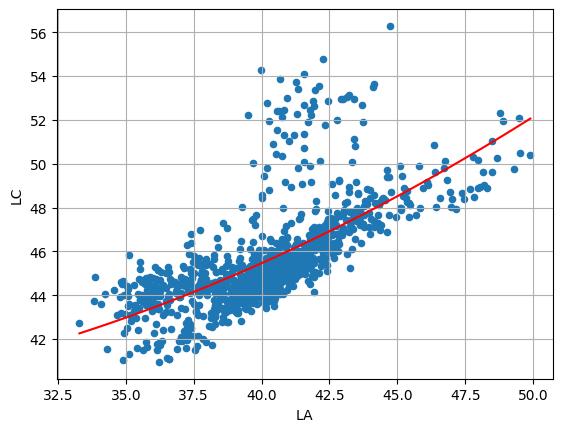

In [14]:

# Then plot the original data as scatter plot and the data predicted by the model
# from the test data
d.plot.scatter('LA', 'LC')
plot(testdata.LA, model.predict(testdata), 'red')

# Then we can add some labels for X and Y axes, and plot the grid
xlabel('LA')
ylabel(r'LC')
grid()


In [15]:
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                     LC   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     429.9
Date:                Sun, 01 Oct 2023   Prob (F-statistic):          2.48e-135
Time:                        11:19:50   Log-Likelihood:                -1961.3
No. Observations:                 999   AIC:                             3929.
Df Residuals:                     996   BIC:                             3943.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       41.5281      7.483      5.550   

Note that the polynomial regression did not provide significantly better solution than linear model, since Rsquared is only a little better, while the p-values of the coefficients are worse than what they were for the corresponding linear model. According to Occam's razor principle, the simpler model is better, so the polynomial regression model should be abandonded, in this case.